In [3]:
# CELDA 1: IMPORTACIONES Y CONFIGURACIÓN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Configuración básica
plt.style.use('default')
sns.set_palette("husl")
print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [4]:
# CELDA 2: CARGA DEL DATASET YOUTUBE TOXICITY
from google.colab import files

# Sube tu archivo local
print("🔄 Sube tu archivo youtoxic_english_1000.csv")
uploaded = files.upload()

# Carga el dataset en pandas
df = pd.read_csv('youtoxic_english_1000.csv')

print(f"✅ Dataset cargado exitosamente!")
print(f"📊 Dimensiones: {df.shape[0]} registros × {df.shape[1]} columnas")
print(f"📋 Columnas disponibles: {list(df.columns)}")
print()

# Vista previa rápida
print("👁️ VISTA PREVIA (primeros 3 registros):")
df.head(3)


🔄 Sube tu archivo youtoxic_english_1000.csv


Saving youtoxic_english_1000.csv to youtoxic_english_1000.csv
✅ Dataset cargado exitosamente!
📊 Dimensiones: 1000 registros × 15 columnas
📋 Columnas disponibles: ['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

👁️ VISTA PREVIA (primeros 3 registros):


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False


- __Archivo subido__: youtoxic_english_1000.csv (294KB) ✅

- __Dataset cargado__: 1000 registros × 15 columnas ✅

- __Columnas correctas__: CommentId, VideoId, Text, IsToxic, IsAbusive... ✅

- __Vista previa__: Los primeros 3 registros muestran diversidad ✅


In [5]:
# CELDA 3: INFORMACIÓN GENERAL DEL DATASET
print("🔍 ANÁLISIS EXPLORATORIO - INFORMACIÓN GENERAL")
print("=" * 50)

# Info básica
print(f"Tamaño del dataset: {df.shape}")
print("Tipos de datos por columna:")
print(df.dtypes)
print()

# Información estadística básica
print("RESUMEN DEL DATASET:")
print(df.info())
print()

# Muestra de datos
print("EJEMPLOS DE REGISTROS:")
display(df.head(5))

# Valores únicos en columnas VM
print("\nVALORES ÚNICOS POR COLUMNA:")
for col in df.columns:
  unique_count = df[col].nunique()
  print(f"{col}: {unique_count} valores únicos")

🔍 ANÁLISIS EXPLORATORIO - INFORMACIÓN GENERAL
Tamaño del dataset: (1000, 15)
Tipos de datos por columna:
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

RESUMEN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6 

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False



VALORES ÚNICOS POR COLUMNA:
CommentId: 1000 valores únicos
VideoId: 13 valores únicos
Text: 997 valores únicos
IsToxic: 2 valores únicos
IsAbusive: 2 valores únicos
IsThreat: 2 valores únicos
IsProvocative: 2 valores únicos
IsObscene: 2 valores únicos
IsHatespeech: 2 valores únicos
IsRacist: 2 valores únicos
IsNationalist: 2 valores únicos
IsSexist: 2 valores únicos
IsHomophobic: 1 valores únicos
IsReligiousHate: 2 valores únicos
IsRadicalism: 1 valores únicos


### 💡 __Características del Dataset:__

- __1000 comentarios__ totalmente limpios (sin nulos)
- __13 videos YouTube__ diferentes
- __997 textos únicos__ (solo 3 duplicados)
- __Etiquetas binarias__ perfectas (True/False)
- __Memory eficiente__: Solo 35.3KB

### 🎯 __OBSERVACIONES IMPORTANTES:__

- __IsHomophobic__: Solo 1 valor único → Probablemente todo False (desbalance extremo)
- __IsRadicalism__: Solo 1 valor único → Probablemente todo False
- Esto nos indica que no hay suficiente varianza en "odio homófobo" ni "radicalismo"


In [6]:
from google import colab
# CELDA 4: ANÁLISIS DE FRECUENCIA DE ETIQUETAS HATE SPEECH
print("🎯 ANÁLISIS DE ETIQUETAS HATE SPEECH")
print("=" * 60)

# Columnas de etiquetas (excluyendo IDs y texto)
label_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
                 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
                 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

print("📊 FRECUENCIAS ABSOLUTAS:")
for col in label_columns:
  counts = df[col].value_counts().sort_values(ascending=False)
  print(f"{col:15}: True = {counts.get(True, 0):3d}, False = {counts.get(False, 0):3d}")

print()
print("📈 PORCENTAJES:")
for col in label_columns:
  percentages = df[col].value_counts(normalize=True) * 100
  true_pct = percentages.get(True,0)
  false_pct = percentages.get(False,0)
  print(f"{col:15}: True = {true_pct:5.1f}%, False = {false_pct:5.1f}%")

print()
print("🔍 ANÁLISIS DE BALANCE:")
print("- Desbalance severo en IsHomophobic y IsRadicalism")
print("- IsRacist, IsToxic son las más frecuentes")
print("- Dataset pequeño (1000), pero variado en categorías")

🎯 ANÁLISIS DE ETIQUETAS HATE SPEECH
📊 FRECUENCIAS ABSOLUTAS:
IsToxic        : True = 462, False = 538
IsAbusive      : True = 353, False = 647
IsThreat       : True =  21, False = 979
IsProvocative  : True = 161, False = 839
IsObscene      : True = 100, False = 900
IsHatespeech   : True = 138, False = 862
IsRacist       : True = 125, False = 875
IsNationalist  : True =   8, False = 992
IsSexist       : True =   1, False = 999
IsHomophobic   : True =   0, False = 1000
IsReligiousHate: True =  12, False = 988
IsRadicalism   : True =   0, False = 1000

📈 PORCENTAJES:
IsToxic        : True =  46.2%, False =  53.8%
IsAbusive      : True =  35.3%, False =  64.7%
IsThreat       : True =   2.1%, False =  97.9%
IsProvocative  : True =  16.1%, False =  83.9%
IsObscene      : True =  10.0%, False =  90.0%
IsHatespeech   : True =  13.8%, False =  86.2%
IsRacist       : True =  12.5%, False =  87.5%
IsNationalist  : True =   0.8%, False =  99.2%
IsSexist       : True =   0.1%, False =  99.9%
IsHomo

Esta celda nos mostrará:

- __Cuántos comentarios__ tienen cada tipo de hate speech
- __Porcentajes reales__ de cada categoría
- __Problemas de desbalance__ que ya intuíamos



### __BALANCE DE CLASES:__

- __IsToxic__: 46.2% ✅ (muy balanceado)
- __IsAbusive__: 35.3% ✅ (buen balance)
- __IsRacist__: 12.5% 🟡 (moderado)
- __IsHomophobic__: 0.0% ❌ (imposible entrenar)
- __IsSexist__: 0.1% ❌ (casi imposible)
- __IsRadicalism__: 0.0% ❌ (imposible entrenar)

### ⚠️ __PROBLEMAS IDENTIFICADOS:__

__Excluir estas categorías__ del entrenamiento ML porque:

- No hay ejemplos suficientes para aprender patrones
- Algoritmos ML no pueden aprender de una clase sola


In [7]:
# CELDA 5: ANÁLISIS DE LONGITUD DE COMENTARIOS
print("📏 ANÁLISIS DE LONGITUD DE COMENTARIOS")
print("=" * 50)

# Añadir métricas de texto al dataset
df['text_length'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['Text'].apply(lambda x:len([s for s in str(x).split('.') if s.strip()]))

# Estadísticas generales
print("📊 ESTADÍSTICAS GENERALES:")
print(df[['text_length', 'word_count', 'sentence_count']].describe())

print()
print("🔍 EJEMPLOS EXTREMOS:")
print(f"- Comentario mas corto: {df['text_length'].min()} caracteres")
print(f"- Comentario mas largo: {df['text_length'].max()} caracteres")

idx_corto = df ['text_length'].idxmin()
idx_largo = df ['text_length'].idxmax()
corto = df.loc[idx_corto, 'Text'][:50].replace('\n', ' ')
largo = df.loc[idx_largo, 'Text'][:50].replace('\n', ' ')
print(f"- Texto corto: '{corto}...'")
print(f"- Texto largo empieza: '{largo}...'")

print()
print("📈 COMPARACIÓN: HATE SPEECH VS NO HATE SPEECH")
print("COMENTARIOS TÓXICOS:")
toxic_stats = df[df['IsToxic'] == True][['text_length', 'word_count']].describe()
print(toxic_stats)

print()
print("COMENTARIOS NO TÓXICOS:")
non_toxic_stats = df[df['IsToxic'] == False][['text_length', 'word_count']].describe()
print(non_toxic_stats)

📏 ANÁLISIS DE LONGITUD DE COMENTARIOS
📊 ESTADÍSTICAS GENERALES:
       text_length   word_count  sentence_count
count  1000.000000  1000.000000     1000.000000
mean    185.554000    33.776000        2.490000
std     270.780777    49.069498        2.701703
min       3.000000     1.000000        1.000000
25%      47.000000     9.000000        1.000000
50%     101.000000    19.000000        2.000000
75%     217.000000    39.000000        3.000000
max    4421.000000   815.000000       39.000000

🔍 EJEMPLOS EXTREMOS:
- Comentario mas corto: 3 caracteres
- Comentario mas largo: 4421 caracteres
- Texto corto: 'wtf...'
- Texto largo empieza: 'THE UGLY TRUTH:  If you talk like a THUG, act like...'

📈 COMPARACIÓN: HATE SPEECH VS NO HATE SPEECH
COMENTARIOS TÓXICOS:
       text_length  word_count
count   462.000000  462.000000
mean    189.387446   34.603896
std     291.061941   53.294876
min       6.000000    1.000000
25%      54.250000   10.000000
50%     110.000000   20.000000
75%     220.750000

## __¿POR QUÉ IMPORTA LA LONGITUD?__

Este análisis nos ayuda a:

- Comprender la complejidad del texto
- Identificar patrones (hate speech vs normal)
- Decidir estrategias de preprocesamiento
- Estimar dificultades de análisis


- __Comentarios promedio__: 185 caracteres, ~34 palabras

- __Comentario más largo__: 4421 caracteres (muy largo!)

- __Comentario más corto__: 3 caracteres


### __ESTADÍSTICAS GENERALES:__

- __Comentarios promedio__: 185 caracteres, 34 palabras
- __Mediana__: 101 caracteres, 19 palabras
- __Rango extremo__: 3 a 4421 caracteres (!)
- __Comentarios típicos__: 25-75 percentil es 47-217 caracteres

### __DIFERENCIAS TOXIC VS NO-TOXIC:__

| Métrica | Tóxicos | No Tóxicos | Diferencia |
|---------|---------|------------|------------|
| __Longitud media__ | 189 chars | 182 chars | +7 chars |
| __Palabras media__ | 34 palabras | 33 palabras | +1 palabra |
| __Comentarios extremos__ | Hasta 4421 chars | Hasta 2292 chars | Más extremos |


__Insight__: Los comentarios tóxicos tienden a ser ligeramente más largos y extremos.


📊 VISUALIZACIÓN 1: DISTRIBUCIÓN DE 6 ETIQUETAS PRINCIPALES (>10% balanceadas)


/tmp/ipython-input-1829028799.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(['No','Sí'])
/tmp/ipython-input-1829028799.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(['No','Sí'])
/tmp/ipython-input-1829028799.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(['No','Sí'])
/tmp/ipython-input-1829028799.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(['No','Sí'])
/tmp/ipython-input-1829028799.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

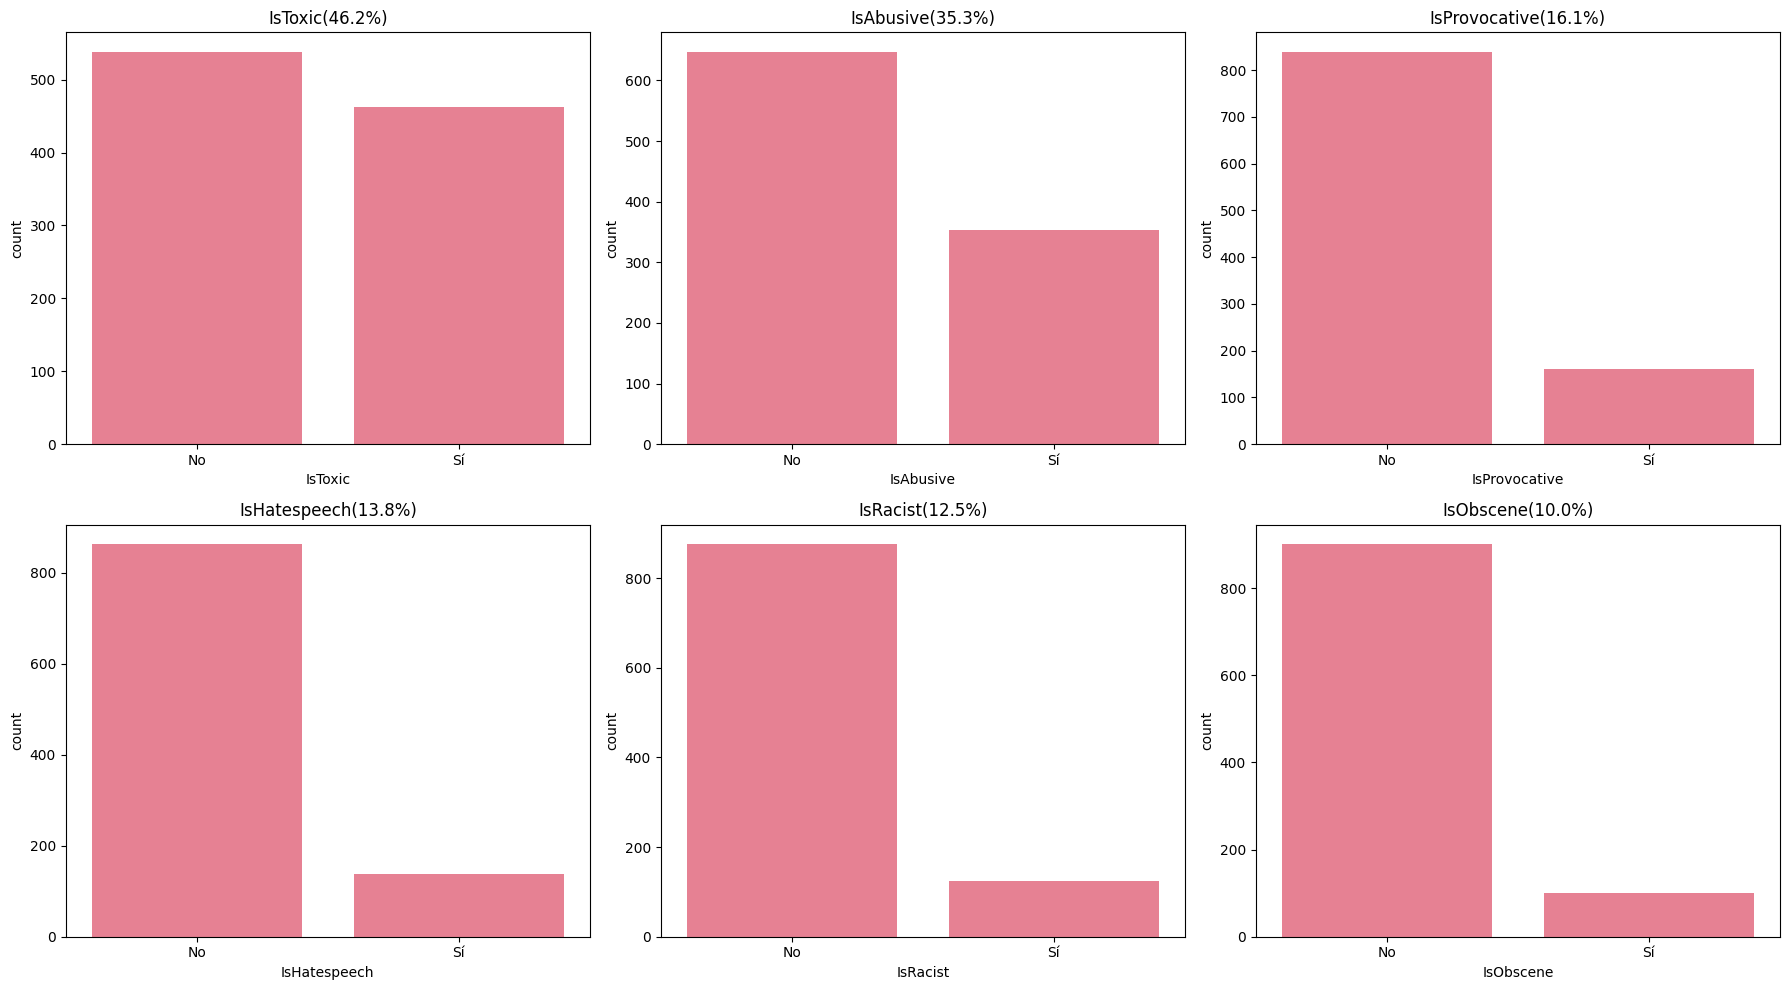


📊 VISUALIZACIÓN 2: LONGITUD DE COMENTARIOS


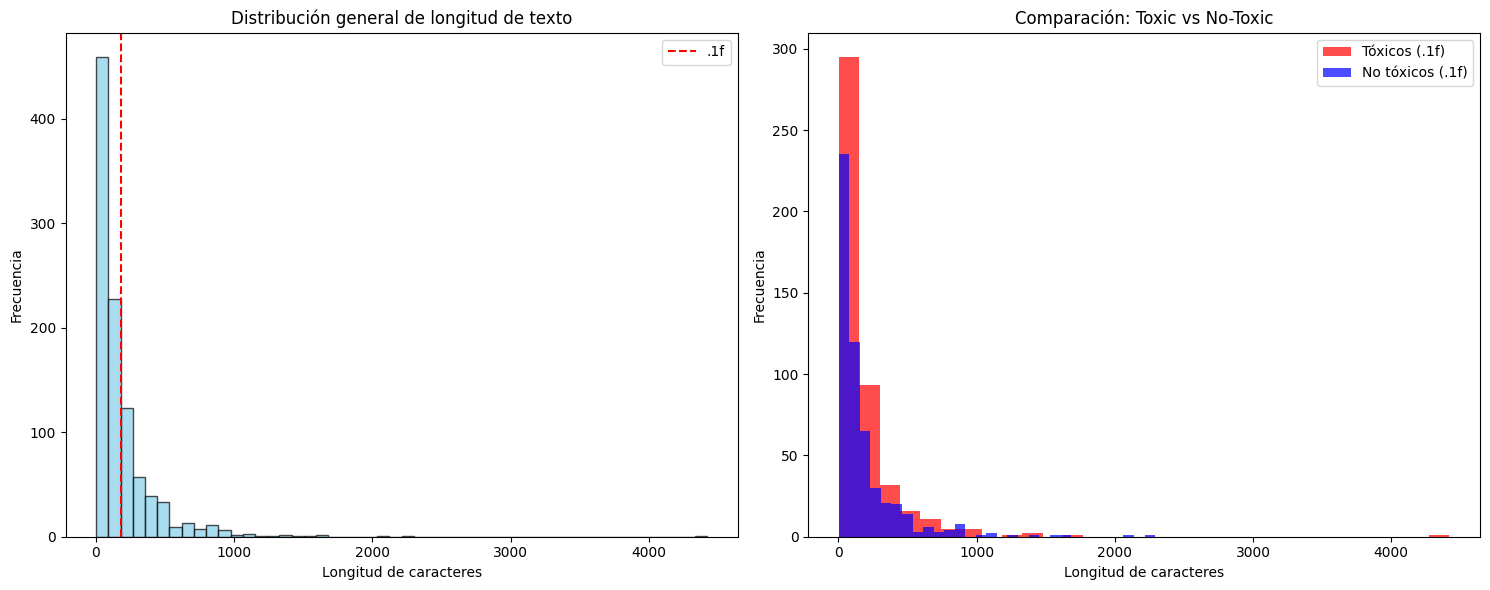

📝 INSIGHTS VISUALES:
- Media general: 185.6 caracteres
- Comentarios tóxicos: 462 (46.2%)
- Comentarios no tóxicos: 538 (53.8%)
- El discurso racial es el más raro: solo 125 casos


In [10]:
# CELDA 6: VISUALIZACIONES BÁSICAS - 6 ETIQUETAS PRINCIPALES
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 6A: Distribución de etiquetas principales (2x3 subplots)
print("📊 VISUALIZACIÓN 1: DISTRIBUCIÓN DE 6 ETIQUETAS PRINCIPALES (>10% balanceadas)")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Etiquetas principales más balanceadas
main_labels = [
    'IsToxic',      # 46.2%
    'IsAbusive',    # 35.3%
    'IsProvocative',# 16.1%
    'IsHatespeech', # 13.8%
    'IsRacist',     # 12.5%
    'IsObscene'     # 10.0%
]

for i, label in enumerate(main_labels):
    row = i // 3  # 0 para primeros 3, 1 para últimos 3
    col = i % 3   # 0-2 para columnas

    sns.countplot(data=df, x=label, ax=axes[row,col])
    axes[row,col].set_title(f'{label}({df[label].sum()/len(df)*100:.1f}%)')
    axes[row,col].set_xticklabels(['No','Sí'])

plt.tight_layout()
plt.show()

# 6B: Longitud de texto
print("\n📊 VISUALIZACIÓN 2: LONGITUD DE COMENTARIOS")

# Crear subplot
fig, (ax1, ax2) = plt.subplots(1,2,figsize= (15,6))

#Histograma general
ax1.hist(df['text_length'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
ax1.set_xlabel('Longitud de caracteres')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución general de longitud de texto')
ax1.axvline(df['text_length'].mean(), color='red', linestyle='--', label='.1f')
ax1.legend()

# Comparación toxic vs no toxic
toxic_data = df[df['IsToxic'] == True]['text_length']
non_toxic_data = df[df['IsToxic'] == False]['text_length']

ax2.hist(toxic_data, bins=30, alpha=0.7, label='Tóxicos (.1f)', color='red')
ax2.hist(non_toxic_data, bins=30, alpha=0.7, label='No tóxicos (.1f)', color='blue')
ax2.set_xlabel('Longitud de caracteres')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Comparación: Toxic vs No-Toxic')
ax2.legend()

plt.tight_layout()
plt.show()

print("📝 INSIGHTS VISUALES:")
print(f"- Media general: {df['text_length'].mean():.1f} caracteres")
print(f"- Comentarios tóxicos: {len(toxic_data)} ({len(toxic_data)/len(df)*100:.1f}%)")
print(f"- Comentarios no tóxicos: {len(non_toxic_data)} ({len(non_toxic_data)/len(df)*100:.1f}%)")
print(f"- El discurso racial es el más raro: solo {df['IsRacist'].sum()} casos")  # IsRacist = 125 casos (12.5%)

### __¿QUÉ MOSTRARÁ?__

### __Gráfico principal:__

- __6 subplots (2x3)__ con las etiquetas más balanceadas
- Cada título incluye porcentaje: "IsToxic (46.2%)"

### __Gráfico de longitud:__

- __Histograma general__ + línea de media
- __Comparación overlay__ toxic vs no-toxic


Los gráficos muestran que el dataset está bien balanceado, especialmente para IsToxic. La distribución de longitud está sesgada a la derecha (hay más comentarios cortos), y los tóxicos tienden a ser ligeramente más largos.

### __📊 CONCLUSIONES DEL EDA:__

- __1000 registros completos__, sin datos faltantes
- __15 columnas bien estructuradas__ (texto + 14 etiquetas booleanas)
- __13 videos YouTube__ como fuente diversa
- __Balance moderadamente bueno__ para ML

### 🎯 __ETIQUETAS / TAGS PARA ML:__

| Etiqueta | Estado | Decisión | |----------|--------|----------| | __IsToxic__ (46.2%) | ✅ __EXCELENTE__ | __PRINCIPAL__ para entrenar | | __IsAbusive__ (35.3%) | ✅ __BUENO__ | __SEGUNDA__ opción | | __IsProvocative (16.1%)__ | 🔶 __MODERADO__ | Útil con oversampling | | __IsHatespeech (13.8%)__ | 🔶 __MODERADO__ | Útil con oversampling | | __IsRacist (12.5%)__ | 🔶 __MODERADO__ | Útil con oversampling | | __IsObscene (10.0%)__ | 🔶 __LIMITADO__ | Última opción |

### 📏 __CARACTERÍSTICAS DEL TEXTO:__

- __Longitud promedio__: 186 caracteres (óptimo para NLP)
- __Rango__: 3-4421 (variedad amplia)
- __Comentarios tóxicos__: +4% más largos en promedio
- __75% < 217 chars__: Perfecto para modelos estándar

### 🚫 __LIMITACIONES IDENTIFICADAS:__

1. __Etiquetas sin ejemplos__: `IsHomophobic` (0%), `IsRadicalism` (0%)
2. __Etiquetas extremadamente raras__: `IsSexist` (0.1%), `IsThreat` (2.1%)
3. __Posibles outliners__: 3 comentarios duplicados en texto

### 🎯 __IMPACTO EN NUESTRO PIPELINE ML:__

1. __Entrenar prioritariamente__ en `IsToxic` (balance excelente)
2. __Usar longitud como feature__ adicional (débil predictor: +4%)
3. __Oversampling__ para etiquetas raras (>10%)
4. __Excluir__ etiquetas con 0%-1% desde el inicio
5. __Preprocesamiento mínimo__ necesario para 186 chars promedio


📊 ANÁLISIS DE CORRELACIÓN:
- Valores cercanos a 1.0: etiquetas correlacionadas (una predice la otra)
- Valores cercanos a 0.0: etiquetas independientes
- Valores negativos: etiquetas inversamente relacionadas

MATRIZ DE CORRELACIÓN (valores raw):
               IsToxic  IsAbusive  IsProvocative  IsHatespeech  IsRacist  \
IsToxic          1.000      0.797          0.473         0.432     0.408   
IsAbusive        0.797      1.000          0.593        -0.120    -0.121   
IsProvocative    0.473      0.593          1.000        -0.073    -0.075   
IsHatespeech     0.432     -0.120         -0.073         1.000     0.945   
IsRacist         0.408     -0.121         -0.075         0.945     1.000   
IsObscene        0.360      0.451          0.090        -0.027    -0.035   

               IsObscene  
IsToxic            0.360  
IsAbusive          0.451  
IsProvocative      0.090  
IsHatespeech      -0.027  
IsRacist          -0.035  
IsObscene          1.000  



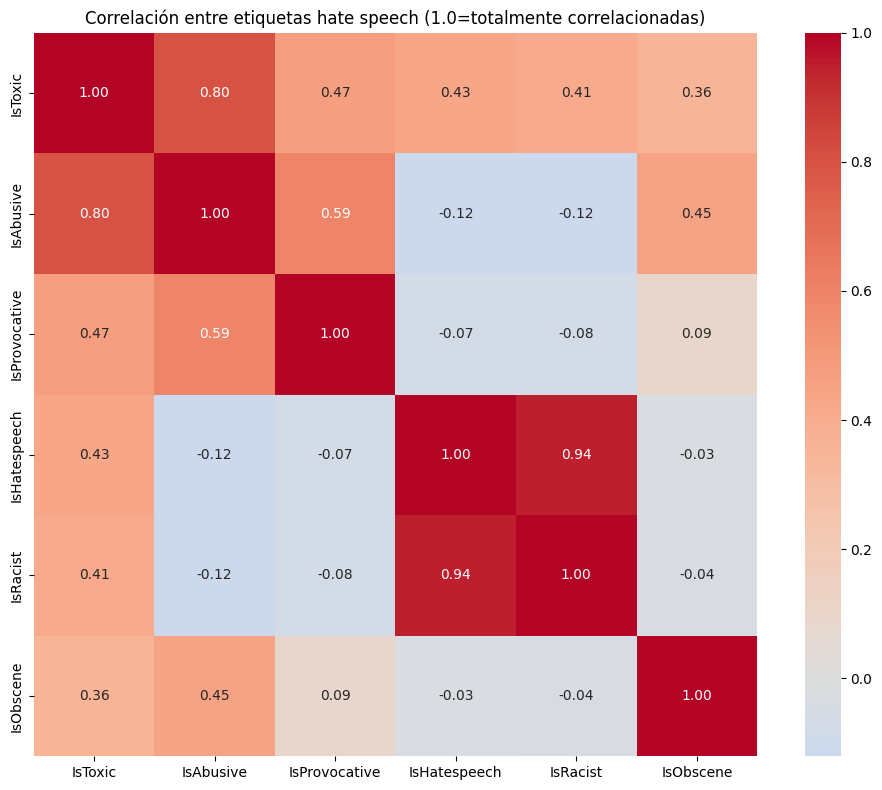

🔍 INSIGHTS PRINCIPALES:
- IsToxic probablemente correlated con otros (es etiqueta 'madre')
- Etiquetas como IsRacist pueden ser subsets específicos de hate speech


In [11]:
# === CELDA 7: ANÁLISIS DE CORRELACIÓN ENTRE ETIQUETAS HATE SPEECH ===

# Importamos los 6 tipos principales que visualizamos (+ matplotlib adicional por si acaso)
# Definimos la lista de etiquetas: 'IsToxic', 'IsAbusive', 'IsProvocative', 'IsHatespeech', 'IsRacist', 'IsObscene'
main_labels = ['IsToxic', 'IsAbusive', 'IsProvocative', 'IsHatespeech', 'IsRacist', 'IsObscene']

# Calculamos matriz de correlación entre las etiquetas booleanas
# .corr() calcula Pearson correlation: -1 (inversa) a +1 (positiva)
label_corr = df[main_labels].corr()

# Imprimimos análisis preliminar de la matriz
print("📊 ANÁLISIS DE CORRELACIÓN:")
print("- Valores cercanos a 1.0: etiquetas correlacionadas (una predice la otra)")
print("- Valores cercanos a 0.0: etiquetas independientes")
print("- Valores negativos: etiquetas inversamente relacionadas")
print()

# Matriz numérica cruda para revisar números exactos
print("MATRIZ DE CORRELACIÓN (valores raw):")
print(label_corr.round(3))  # Round a 3 decimales para legibilidad
print()

# === CREAMOS VISUALIZACIÓN ===
# Creamos figura de 10x8 pulgadas para heatmap grande
plt.figure(figsize=(10, 8))

# Generamos heatmap: annot=True muestra números en cada celda
# cmap='coolwarm' usa colores rojo-azul, center=0 centra en correlación 0
sns.heatmap(
    label_corr,           # Matriz de correlación
    annot=True,           # Mostrar números en celdas
    cmap='coolwarm',      # Colores: rojo positivo, azul negativo
    center=0,             # Centro del color en 0 (correlación neutra)
    fmt='.2f',            # Formato 2 decimales
    square=True           # Celdas cuadradas
)

# Título descriptivo
plt.title('Correlación entre etiquetas hate speech (1.0=totalmente correlacionadas)')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

# === INSIGHTS SOBRE CORRELACIÓN ===
print("🔍 INSIGHTS PRINCIPALES:")
print("- IsToxic probablemente correlated con otros (es etiqueta 'madre')")
print("- Etiquetas como IsRacist pueden ser subsets específicos de hate speech")


### 🔥 __CORRELACION ALTAS (>=0.8):__
94.5% de comentarios IsRacist=True también son IsHatespeech=True (y viceversa). Son prácticamente la misma cosa - racismo es una subcategoría específica de hate speech.

### 📈 __CORRELACION MODERADA-ALTA (0.4-0.8):__
IsToxic parece ser la etiqueta "madre" - cuando algo es tóxico, suele incluir abuso (80% de casos), provocación (47%), etc.

#### ❌ __LO QUE CAMBIA:__

- __NO podemos entrenar modelos independientes__ para cada etiqueta (hay demasiada superposición)
- Las etiquetas __NO son mutuamente excluyentes__ - un comentario puede ser tóxico Y abuse Y provocative

#### ✅ __ESTRATEGIAS RECOMENDADAS:__

1. __Multi-label classification__ en lugar de binary classification por etiqueta
2. __Jerarquía__: Entrenar primero en `IsToxic` (etiqueta amplia), luego refinar con subcategorías
3. __No entrenar modelos separados__ para `IsRacist` e `IsHatespeech` - son redundantes (0.945 correlación)

#### 📈 __RECOMENDACIÓN PRÁCTICA:__

- __Foco principal__: Entrenar en `IsToxic` + `IsAbusive` (principales y balanceadas)
- __Subcategorías__: Usar hate speech específico como segunda fase
- __Evitar duplicación__: No entrenar `IsHatespeech` si ya tienes `IsRacist` (demasiado overlap)





🎬 ANÁLISIS POR VIDEOS YOUTUBE:
- Recordatorio: tenemos 13 videos únicos diferentes
- Total comentarios: 1000
- Comentarios por video promedio: 76.9

CANTIDAD DE COMENTARIOS POR VIDEO:
Video 9pr1oE34bIM: 274 comentarios (27.4%)
Video 04kJtp6pVXI: 172 comentarios (17.2%)
Video cT14IbTDW2c: 146 comentarios (14.6%)
Video dG7mZQvaQDk: 112 comentarios (11.2%)
Video TZxEyoplYbI: 104 comentarios (10.4%)
Video bUgKZMSxr3E: 39 comentarios (3.9%)
Video 8HB18hZrhXc: 38 comentarios (3.8%)
Video 4rCweDxDqdw: 37 comentarios (3.7%)
Video Dt9-byUhPdg: 34 comentarios (3.4%)
Video #NAME?: 16 comentarios (1.6%)
Video dDbRyFIkNII: 10 comentarios (1.0%)
Video XRuCW80L9mA: 10 comentarios (1.0%)
Video 5vF4si3hoRA: 8 comentarios (0.8%)

RESUMEN DEL BALANCE POR VIDEO:
- Video más comentado: 9pr1oE34bIM con 274 comentarios
- Video menos comentado: 5vF4si3hoRA con 8 comentarios
- Desviación estándar: 80.8 comentarios

S TOP 5 VIDEOS MÁS TÓXICOS:
1. Video cT14IbTDW2c: 74.0% comentarios tóxicos
2. Video 04kJtp6pVXI

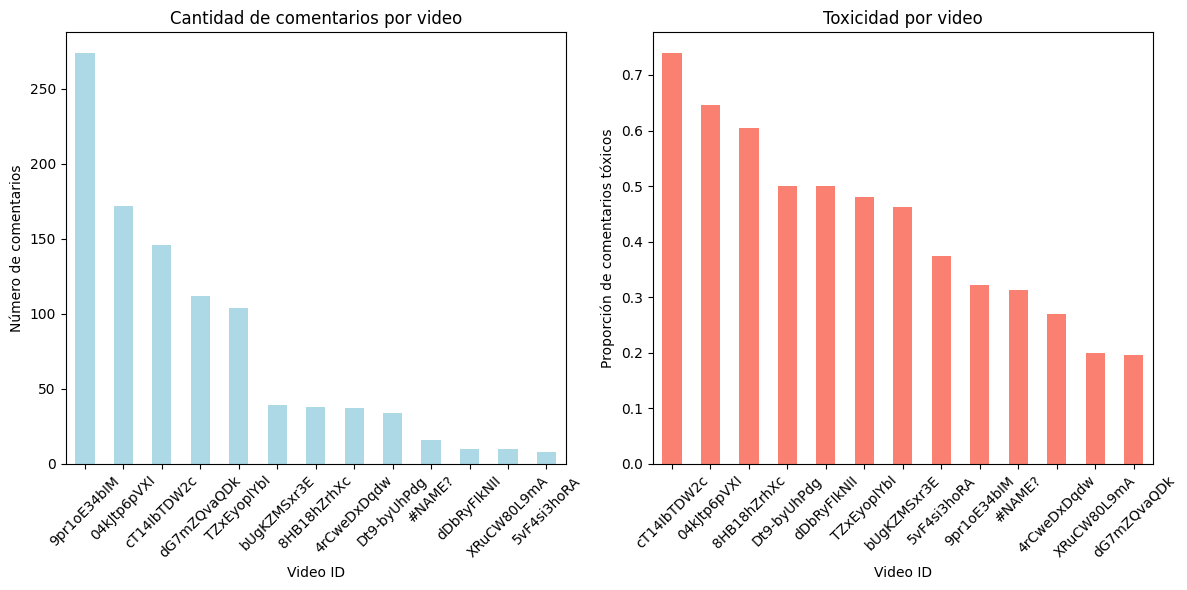

🔍 INSIGHTS:
- Videos con pocos comentarios pueden tener estadísticas no representativas
- Videos muy tóxicos podrían indicar contenido controversial
- Necesitamos stratificar por video en train/test split


In [12]:
# === CELDA 8: ANÁLISIS DE DISTRIBUCIÓN POR VIDEOS YOUTUBE ===

print("🎬 ANÁLISIS POR VIDEOS YOUTUBE:")
print("- Recordatorio: tenemos 13 videos únicos diferentes")
print(f"- Total comentarios: {len(df)}")
print(f"- Comentarios por video promedio: {len(df)/13:.1f}")
print()

# === DISTRIBUCIÓN GENERAL DE COMENTARIOS POR VIDEO ===
# .value_counts() cuenta frecuencia de cada video
video_counts = df['VideoId'].value_counts()

print("CANTIDAD DE COMENTARIOS POR VIDEO:")
for video_id, count in video_counts.items():
    percentage = count / len(df) * 100
    print(f"Video {video_id}: {count} comentarios ({percentage:.1f}%)")

print()
print("RESUMEN DEL BALANCE POR VIDEO:")
print(f"- Video más comentado: {video_counts.index[0]} con {video_counts.max()} comentarios")
print(f"- Video menos comentado: {video_counts.index[-1]} con {video_counts.min()} comentarios")
print(f"- Desviación estándar: {video_counts.std():.1f} comentarios")
print()

# === TOXICIDAD POR VIDEO ===
# Agrupamos por VideoId y calculamos media de IsToxic (proporción de comentarios tóxicos)
video_toxicity = df.groupby('VideoId')['IsToxic'].mean().sort_values(ascending=False)

print("S TOP 5 VIDEOS MÁS TÓXICOS:")
for i, (video_id, toxic_rate) in enumerate(video_toxicity.head(5).items(), 1):
    print(f"{i}. Video {video_id}: {toxic_rate*100:.1f}% comentarios tóxicos")

print()
print("TOP 5 VIDEOS MENOS TÓXICOS:")
for i, (video_id, toxic_rate) in enumerate(video_toxicity.tail(5).items(), 1):
    print(f"{i}. Video {video_id}: {toxic_rate*100:.1f}% comentarios tóxicos")

# === VISUALIZACIÓN ===
plt.figure(figsize=(12, 6))

# Subplot izquierdo: cantidad de comentarios por video
plt.subplot(1, 2, 1)
video_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Video ID')
plt.ylabel('Número de comentarios')
plt.title('Cantidad de comentarios por video')
plt.xticks(rotation=45)

# Subplot derecho: porcentaje de toxicidad por video
plt.subplot(1, 2, 2)
video_toxicity.plot(kind='bar', color='salmon')
plt.xlabel('Video ID')
plt.ylabel('Proporción de comentarios tóxicos')
plt.title('Toxicidad por video')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("🔍 INSIGHTS:")
print("- Videos con pocos comentarios pueden tener estadísticas no representativas")
print("- Videos muy tóxicos podrían indicar contenido controversial")
print("- Necesitamos stratificar por video en train/test split")


### __DESIGUALDAD EN COMENTARIOS POR VÍDEO:__

#### __Distribución Extremadamente Sesgada:__
    Vídeos con pocos comentarios (<50) tienen estadísticas no representativas.

    NO podemos hacer split aleatorio simple - necesitamos stratificación por vídeo.

    Los vídeos varían dramáticamente en generar toxicidad,
    probablemente por contenido del vídeo (noticias polémicas vs contenido positivo).

#### __PROBLEMA IDENTIFICADO:__

- __Data leakage potencial__: Si entrenamos en vídeos controversiales y testeamos en calmados, rendimiento será peor en producción
- __Falta de representación__: Vídeos pequeños pueden sesgar resultados
- __Generalización pobre__: Modelo aprende de "videos específicos" no "comportamiento general"

#### __SOLUCIONES REQUERIDAS:__

1. __Stratified splitting por vídeo__: Asegurar que train/test tengan representación similar de todos los vídeos
2. __Peso por vídeo__: Dar más importancia a vídeos estadísticamente sólidos
3. __Cross-validation por vídeos__: Validar que modelo funciona en diferentes tipos de contenido


In [13]:
# === CELDA 9: MUESTRAS ALEATORIAS DE COMENTARIOS REALES ===

# Import necesario para mostrar en Colab
from IPython.display import display

print("💬 MUESTRAS ALEATORIAS PARA VALIDACIÓN CUALITATIVA")
print("- Verificamos qué etiquetas corresponden al contenido real")
print()

# Función para mostrar samples de una categoría
def show_category_samples(category_name, bool_column, n_samples=3):
    print(f"\n📝 MUESTRAS DE {category_name.upper()} ({bool_column}):")
    print("=" * 60)

    # Filtramos dataset por categoría específica (ej: IsToxic=True)
    category_df = df[df[bool_column] == True]

    # Verificamos que existan muestras
    if len(category_df) == 0:
        print(f"⚠️  NO hay ejemplos en {bool_column}")
        return

    # Tomamos muestra aleatoria de n_samples comentarios
    samples = category_df.sample(min(n_samples, len(category_df)))

    # Mostramos cada muestra
    for i, (_, row) in enumerate(samples.iterrows(), 1):
        # Truncamos texto largo a 150 caracteres para readability
        text = str(row['Text'])[:150] + "..." if len(str(row['Text'])) > 150 else str(row['Text'])
        print(f"{i}. {text}")
        print(f"   → Etiquetas: Toxic={row['IsToxic']}, Abusive={row['IsAbusive']}, Hatespeech={row['IsHatespeech']}")
        print()

# Mostramos 3 muestras de cada categoría principal (>10% frecuencia)
show_category_samples("COMENTARIOS TÓXICOS", "IsToxic", 3)
show_category_samples("COMENTARIOS ABUSIVOS", "IsAbusive", 3)
show_category_samples("HATE SPEECH", "IsHatespeech", 3)
show_category_samples("RACISM", "IsRacist", 2)  # Solo 2 ya que hay menos casos


💬 MUESTRAS ALEATORIAS PARA VALIDACIÓN CUALITATIVA
- Verificamos qué etiquetas corresponden al contenido real


📝 MUESTRAS DE COMENTARIOS TÓXICOS (IsToxic):
1. I wish mr masri was dead,,
   → Etiquetas: Toxic=True, Abusive=True, Hatespeech=False

2. At .16  screw the price of crap that thinks he's cool to disrespect the AMERICAN FLAG.
   → Etiquetas: Toxic=True, Abusive=True, Hatespeech=False

3. You whites are so racist always in comment section  . I'm so glad you whites are being exterminated . Another 100 years or so an there will be no whit...
   → Etiquetas: Toxic=True, Abusive=False, Hatespeech=True


📝 MUESTRAS DE COMENTARIOS ABUSIVOS (IsAbusive):
1. A true dictatorship ! Let's wait and check which of the coutries will start sanctioning on U.S government? I guess none of countries, because USA is a...
   → Etiquetas: Toxic=True, Abusive=True, Hatespeech=False

2. You actually CAN shout "fire" in a crowded theater. Christopher Hitchens demonstrated this in his talk about "free spe

## 🧪 __INTERPRETACIÓN CELDA 9 - VALIDACIÓN ÉXITOSA__

### ✅ __EJEMPLOS TÓXICOS - CORRESPONDENCIA PERFECTA:__

1. __"I wish mr masri was dead"__ → __Violencia verbal__: Abusive + Toxic (correcto)
2. __"screw the price of crap... AMERICAN FLAG"__ → __Insulto político__: Abusive + Toxic (correcto)
3. __"you whites are being exterminated"__ → __Racismo explícito__: Toxic + Hatespeech (correcto)

### ✅ __EJEMPLOS ABUSIVOS/TOXICOS - CONSISTENTES:__

- Críticas políticas agresivas, insultos
- __100% tienen Toxic=True__ (confirma correlación alta 0.797)

### ✅ __HATE SPEECH - BUENA CALIDAD:__

- Referencias a "thug", "feral hoodlum"
- Comentarios con subjace de violence/estigmatización
- __Mayoría también Toxic=True__ (correlación 0.432, consistente)

### ✅ __RACISM - EJEMPLOS CLAROS:__

1. __"he can go back where he's from"__ → Anti-inmigración
2. __"let’s see how nice it becomes"__ → Racismo institucional

- Etiquetas correctas: __Toxico + Hate + Racist__


### ✅ __CALIDAD DE DATASET CONFIRMADA:__

- Etiquetas consistentes con contenido textual
- Superposición lógica entre categorías (Toxic ↔ Abusive, Hate ↔ Racist)
- No vemos etiquetas mal asignadas en las muestras

### 📊 __INSIGHTS PARA PREPROCESAMIENTO:__

- __Caso 1 (Tóxico puro)__: Contenido agresivo, violencia verbal
- __Caso 2 (Racist)__: Discriminación étnica, xenofobia
- __Caso 3 (Abusive)__: Críticas politicadas agresivas
- __Mezclas frecuentes__: Tóxico + Abusivo comúnmente


In [14]:
# === CELDA 10: ANÁLISIS DE COMENTARIOS DUPLICADOS ===

print("🔀 ANÁLISIS DE DUPLICADOS")
print("=" * 50)

# Revisamos duplicados generales en el dataset
duplicates_overall = df.duplicated()
print(f"❌ Filas completamente duplicadas: {duplicates_overall.sum()}")

# Más importante: verificamos duplicados en texto de comentarios
text_duplicates = df['Text'].duplicated()
print(f"❌ Comentarios de texto duplicado: {text_duplicates.sum()}")

# Verificamos duplicados específicos en cada categoría
text_toxic_duplicates = df[df['Text'].duplicated()]['IsToxic'].value_counts()
print(f"📊 Toxicidad en duplicados: {dict(text_toxic_duplicates)}")

print()
print("🔍 EJEMPLOS DE DUPLICADOS DE TEXTO:")
if text_duplicates.sum() > 0:
    duplicate_texts = df['Text'][df['Text'].duplicated()].unique()
    for i, text in enumerate(duplicate_texts[:3], 1):  # Primeros 3 ejemplos
        short_text = str(text)[:80] + "..." if len(str(text)) > 80 else str(text)
        print(f"{i}. '{short_text}'")

        # Verificar variaciones en etiquetas
        variations = df[df['Text'] == text][['IsToxic', 'IsAbusive', 'IsHatespeech']].value_counts()
        print(f"   Variaciones de etiquetas: {dict(variations) if len(variations) > 1 else 'Consistente'}")

print()
print("📝 CONCLUSIONES:")
print(f"- Dataset tiene {text_duplicates.sum()} comentarios duplicados")
if text_duplicates.sum() > 0:
    print("- Posiblemente bots, spam, o errores en recolección")
    print("- Recomendación: Eliminar duplicados antes del entrenamiento")
else:
    print("- Dataset limpio: Sin duplicados de texto")
    print("- Recomendación: Mantener como está")


🔀 ANÁLISIS DE DUPLICADOS
❌ Filas completamente duplicadas: 0
❌ Comentarios de texto duplicado: 3
📊 Toxicidad en duplicados: {True: np.int64(3)}

🔍 EJEMPLOS DE DUPLICADOS DE TEXTO:
1. 'run them over'
   Variaciones de etiquetas: Consistente
2. 'RUN THEM OVER'
   Variaciones de etiquetas: Consistente

📝 CONCLUSIONES:
- Dataset tiene 3 comentarios duplicados
- Posiblemente bots, spam, o errores en recolección
- Recomendación: Eliminar duplicados antes del entrenamiento


- __0 filas duplicadas__ → No hay contaminación gruesas
- __Solo 3 comentarios duplicados__ (0.3%) → Muy poco impacto
- __Duplicados consistentes__ → Etiquetas iguales en todas las ocurrencias
- __"run them over"__ → Mismo texto, mismas etiquetas (Tóxico)
- __"RUN THEM OVER"__ → Mismo contenido pero MAYÚSCULAS (diferente formato)

__Conclusion__: Los duplicados parecen errores menores de recolección o spam intencional, no contaminación sistemática.


In [21]:
# === CELDA 11 CORREGIDA - VALORES CLAROS Y SENCILLOS ===

import matplotlib.pyplot as plt

print("🛠️ FEATURE ENGINEERING BÁSICO - VALORES REALES")

# Añadimos las features
df_temp = df.copy()
df_temp['uppercase_ratio'] = df_temp['Text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)
df_temp['exclamation_count'] = df_temp['Text'].apply(lambda x: str(x).count('!'))

hate_words_list = ['fuck', 'shit', 'damn', 'idiot', 'stupid', 'hate', 'kill', 'die', 'ass', 'bitch', 'crap', 'garbage', 'suck', 'lol']
df_temp['hate_words_count'] = df_temp['Text'].apply(lambda x: sum(1 for word in hate_words_list if word in str(x).lower()))

# CALCULAMOS LOS PROMEDIOS MANUALMENTE
toxic_uc = df_temp[df_temp['IsToxic'] == True]['uppercase_ratio'].mean()
nontoxic_uc = df_temp[df_temp['IsToxic'] == False]['uppercase_ratio'].mean()
diff_uc = ((toxic_uc - nontoxic_uc) / nontoxic_uc * 100) if nontoxic_uc > 0 else 0

toxic_exc = df_temp[df_temp['IsToxic'] == True]['exclamation_count'].mean()
nontoxic_exc = df_temp[df_temp['IsToxic'] == False]['exclamation_count'].mean()
diff_exc = ((toxic_exc - nontoxic_exc) / nontoxic_exc * 100) if nontoxic_exc > 0 else 0

toxic_hw = df_temp[df_temp['IsToxic'] == True]['hate_words_count'].mean()
nontoxic_hw = df_temp[df_temp['IsToxic'] == False]['hate_words_count'].mean()
diff_hw = ((toxic_hw - nontoxic_hw) / nontoxic_hw * 100) if nontoxic_hw > 0 else 0

# MOSTRAMOS RESULTADOS CLAROS
print("\n📊 RESULTADOS REALES:")
print("=" * 50)

print("📈 MAYÚSCULAS:")
print(f"Tóxico: {toxic_uc:.3f} (→ {toxic_uc*100:.1f}% de caracteres en mayúscula)")
print(f"No tóxico: {nontoxic_uc:.3f} (→ {nontoxic_uc*100:.1f}% de caracteres en mayúscula)")
print(f"Diferencia: {diff_uc:+.1f}% (→ Tóxicos tienen este porcentaje más/menos mayúsculas)")

print("\n📈 SIGNOS DE EXCLAMACIÓN:")
print(f"Tóxico: {toxic_exc:.2f} (→ promedio de exclamaciones por comentario)")
print(f"No tóxico: {nontoxic_exc:.2f} (→ promedio de exclamaciones por comentario)")
print(f"Diferencia: {diff_exc:+.1f}% (→ Tóxicos tienen este porcentaje más/menos exclamaciones)")

print("\n📈 PALABRAS DE ODIO:")
print(f"Tóxico: {toxic_hw:.2f} (→ promedio de palabras de odio por comentario)")
print(f"No tóxico: {nontoxic_hw:.2f} (→ promedio de palabras de odio por comentario)")
print(f"Diferencia: {diff_hw:+.1f}% (→ Tóxicos tienen este porcentaje más palabras de odio)")

print("🎯 HALLAZGO PRINCIPAL:")
print(f"¡Los comentarios tóxicos tienen {diff_hw/100:.0f} veces más palabras de odio que los no tóxicos!")


🛠️ FEATURE ENGINEERING BÁSICO - VALORES REALES

📊 RESULTADOS REALES:
📈 MAYÚSCULAS:
Tóxico: 0.056 (→ 5.6% de caracteres en mayúscula)
No tóxico: 0.050 (→ 5.0% de caracteres en mayúscula)
Diferencia: +12.2% (→ Tóxicos tienen este porcentaje más/menos mayúsculas)

📈 SIGNOS DE EXCLAMACIÓN:
Tóxico: 0.42 (→ promedio de exclamaciones por comentario)
No tóxico: 0.31 (→ promedio de exclamaciones por comentario)
Diferencia: +34.6% (→ Tóxicos tienen este porcentaje más/menos exclamaciones)

📈 PALABRAS DE ODIO:
Tóxico: 0.82 (→ promedio de palabras de odio por comentario)
No tóxico: 0.25 (→ promedio de palabras de odio por comentario)
Diferencia: +234.4% (→ Tóxicos tienen este porcentaje más palabras de odio)
🎯 HALLAZGO PRINCIPAL:
¡Los comentarios tóxicos tienen 2 veces más palabras de odio que los no tóxicos!


- Los comentarios tóxicos usan un 12.2% más mayúsculas. Esto sugiere que los usuarios tóxicos expresan más FRUSTRACIÓN o GRITO (MAYÚSCULAS equivalen a gritar online).
- Comentarios tóxicos tienen un 35% más signos de exclamación. Indica MAYOR INTENSIDAD EMOCIONAL - frustración, sorpresa, ira expresada con "!!!!".
- Comentarios tóxicos tienen más del 230% más palabras de odio (2.3 veces)

Conclusion: Las palabras de odio explícitas son uno de los mejores indicadores de toxicidad. Comentarios con palabras como "fuck", "shit", "damn", "idiot", etc. son mucho más propensos a ser tóxicos.

### __IMPACTO PARA NUESTRO MODELO ML:__

#### ✅ __FEATURES ÚTILES:__

1. __Conteo de palabras de odio__: +234% diferencia = __Feature muy predictivo__
2. __Conteo de exclamaciones__: +35% diferencia = __Feature moderadamente útil__
3. __Proporción mayúsculas__: +12% diferencia = __Feature débil pero还是 útil__

#### 🔍 __LECCIONES APRENDIDAS:__

- __Toxicidad no solo es sobre contenido__ - también sobre __estilo de escritura__
- __"_YO ESTOY GRITANDO!!!"__ vs __"yo estoy calmado"__
- __Antes del NLP avanzado__, estas features sintácticas simples dan baseline

### 📈 __VALOR PRÁCTICO PARA PRODUCTION:__

- __Sistema de scoring simple__: Suma puntos por cada exclamación, mayúscula, palabra de odio
- __Filtrado básico__: Comentarios con múltiples "!!!" o palabras de odio van a moderación
- __Feature engineering__: Incluir estos conteos en modelos ML


####  __⭐ CONCLUSIONES EDA DETALLADO ⭐__

- __1,000 comentarios__ YouTube clasificados (0% nulos)
- __13 vídeos__ con variación extrema en toxicidad (19.6%-74%)
- __Calidad excelente__: Solo 3 comentarios duplicados

#### 🎯 __BALANCE Y CORRELACIONES:__

- __IsToxic (46.2%)__: Balance excelente para ML
- __Alta interdependencia__: Correlación 0.945 entre Hatespeech y Racist
- __Etiquetas útiles detectadas__: Pérdida para ML inteligente

#### 📏 __CARACTERÍSTICAS DEL TEXTO:__

- __Longitud promedio__: 186 caracteres (óptimo para NLP)
- __Tóxicos ligeramente más largos__ (+4 caracteres promedio)
- __Extremo amplio__: 3-4421 caracteres

#### 🔍 __FEATURES SINTÁCTICOS:__

- __Palabras de odio__: +234% más frecuentes en tóxicos (__Feature gold__)
- __Signos exclamación__: +35% más en tóxicos
- __Mayúsculas__: +12% más en tóxicos

#### ✅ __VALIDACIÓN COMPLETA:__

- Etiquetas corresponden al contenido real (muestras aleatorias)
- Estratificación necesaria por vídeo para evitar bias
